In [1]:
################################################################################
# Reading in data
################################################################################
dataset = read.csv("C:\\Users\\joyse\\Downloads\\cleaned_dataset.csv")

In [4]:
summary(lm(Salary~Age+Years.of.Experience+Gender_binary+Education.LevelHighSchool_combined+Education.LevelBachelors_combined
  +Education.LevelMasters_combined+Education.LevelPhD_combined, dataset
  ))


Call:
lm(formula = Salary ~ Age + Years.of.Experience + Gender_binary + 
    Education.LevelHighSchool_combined + Education.LevelBachelors_combined + 
    Education.LevelMasters_combined + Education.LevelPhD_combined, 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-137623  -19566   -4709   15335   89467 

Coefficients: (1 not defined because of singularities)
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        138479.1     3578.9  38.693   <2e-16 ***
Age                                 -1992.2      131.4 -15.162   <2e-16 ***
Years.of.Experience                  8010.2      166.3  48.169   <2e-16 ***
Gender_binary                       -6159.0      706.1  -8.722   <2e-16 ***
Education.LevelHighSchool_combined -60163.5     1748.9 -34.400   <2e-16 ***
Education.LevelBachelors_combined  -24012.5     1106.2 -21.707   <2e-16 ***
Education.LevelMasters_combined    -12029.6     1058.1 -11.370   <2e-16 ***
Ed

In [13]:
summary(lm(log(Salary)~log(Age)+log(Years.of.Experience+1)+Gender_binary+Education.LevelHighSchool_combined+Education.LevelBachelors_combined
  +Education.LevelMasters_combined+Education.LevelPhD_combined, dataset
  ))


Call:
lm(formula = log(Salary) ~ log(Age) + log(Years.of.Experience + 
    1) + Gender_binary + Education.LevelHighSchool_combined + 
    Education.LevelBachelors_combined + Education.LevelMasters_combined + 
    Education.LevelPhD_combined, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84671 -0.16452 -0.01934  0.14652  0.89927 

Coefficients: (1 not defined because of singularities)
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        13.423561   0.106306 126.272   <2e-16 ***
log(Age)                           -0.935246   0.035098 -26.647   <2e-16 ***
log(Years.of.Experience + 1)        0.779647   0.010788  72.271   <2e-16 ***
Gender_binary                      -0.057013   0.005998  -9.506   <2e-16 ***
Education.LevelHighSchool_combined -0.519169   0.016317 -31.818   <2e-16 ***
Education.LevelBachelors_combined  -0.167002   0.009354 -17.854   <2e-16 ***
Education.LevelMasters_combined    -0.0985

In [31]:
head(dataset)

,Age,Education.Level,Job.Title,Years.of.Experience,Salary,Gender_binary,Education.LevelHighSchool_combined,Education.LevelBachelors_combined,Education.LevelMasters_combined,Education.LevelPhD_combined
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,32,Bachelor's,Software Engineer,5,90000,0,0,1,0,0
2,28,Master's,Data Analyst,3,65000,1,0,0,1,0
3,45,PhD,Senior Manager,15,150000,0,0,0,0,1
4,36,Bachelor's,Sales Associate,7,60000,1,0,1,0,0
5,52,Master's,Director,20,200000,0,0,0,1,0
6,29,Bachelor's,Marketing Analyst,2,55000,0,0,1,0,0


In [32]:
colnames(dataset)

[1] "Age"                                "Education.Level"                   
 [3] "Job.Title"                          "Years.of.Experience"               
 [5] "Salary"                             "Gender_binary"                     
 [7] "Education.LevelHighSchool_combined" "Education.LevelBachelors_combined" 
 [9] "Education.LevelMasters_combined"    "Education.LevelPhD_combined"

In [33]:
################################################################################
# Summarize Data
################################################################################
summary(dataset)
# lol add plots later 

      Age        Education.Level     Job.Title         Years.of.Experience
 Min.   :21.00   Length:6696        Length:6696        Min.   : 0.000     
 1st Qu.:28.00   Class :character   Class :character   1st Qu.: 3.000     
 Median :32.00   Mode  :character   Mode  :character   Median : 7.000     
 Mean   :33.63                                         Mean   : 8.099     
 3rd Qu.:38.00                                         3rd Qu.:12.000     
 Max.   :62.00                                         Max.   :34.000     
     Salary       Gender_binary    Education.LevelHighSchool_combined
 Min.   : 25000   Min.   :0.0000   Min.   :0.00000                   
 1st Qu.: 70000   1st Qu.:0.0000   1st Qu.:0.00000                   
 Median :115000   Median :0.0000   Median :0.00000                   
 Mean   :115395   Mean   :0.4497   Mean   :0.06691                   
 3rd Qu.:160000   3rd Qu.:1.0000   3rd Qu.:0.00000                   
 Max.   :250000   Max.   :1.0000   Max.   :1.00000     

In [34]:
options(scipen = 999)
custom_summary <- function(data, variable_names) {
  result <- data.frame(Variable = character(), 
                       Min = numeric(), 
                       Max = numeric(),
                       Median = numeric(),
                       Mean = numeric(), 
                       SD = numeric(), 
                       Count = numeric())
  
  for (variable in variable_names) {
    count <- sum(!is.na(data[[variable]]))
    mean_val <- mean(data[[variable]], na.rm = TRUE)
    median_val <- median(data[[variable]], na.rm = TRUE)
    sd_val <- sd(data[[variable]], na.rm = TRUE)
    min_val <- min(data[[variable]], na.rm = TRUE)
    max_val <- max(data[[variable]], na.rm = TRUE)
    
    summary_row <- data.frame(Variable = variable,
                              Min = round(min_val,3),
                              Max = round(max_val, 3),
                              Median = round(median_val,3),
                              Mean = round(mean_val,3),
                              SD = round(sd_val,3),
                              Count = count)
    
    result <- rbind(result, summary_row)
  }
  
  return(result)
}


# Call the custom summary function
summary_table <- custom_summary(dataset, c("Age", "Years.of.Experience", "Salary"))
print(summary_table)

             Variable   Min    Max Median       Mean        SD Count
1                 Age    21     62     32     33.627     7.615  6696
2 Years.of.Experience     0     34      7      8.099     6.059  6696
3              Salary 25000 250000 115000 115395.422 52723.995  6696


In [63]:
### Summary Qualitative Variables
variables <- c("Gender_binary", "Education.LevelHighSchool_combined", "Education.LevelBachelors_combined", 
              "Education.LevelMasters_combined", "Education.LevelPhD_combined"
              )

# Loop through variables
for (variable in variables) {
  cat("Variable:", variable, "\n")
  
  # Get count and frequency of categories
  counts <- table(dataset[[variable]])
  frequency <- prop.table(counts)
  
  # Create dataframe with count and frequency
  summary_df <- data.frame(Category = names(counts),
                           Count = as.numeric(counts),
                           Frequency = round(as.numeric(frequency),3))
  
  # Print summary dataframe
  print(summary_df)
  cat("\n")
}

Variable: Gender_binary 
  Category Count Frequency
1        0  3685      0.55
2        1  3011      0.45

Variable: Education.LevelHighSchool_combined 
  Category Count Frequency
1        0  6248     0.933
2        1   448     0.067

Variable: Education.LevelBachelors_combined 
  Category Count Frequency
1        0  3677     0.549
2        1  3019     0.451

Variable: Education.LevelMasters_combined 
  Category Count Frequency
1        0  4835     0.722
2        1  1861     0.278

Variable: Education.LevelPhD_combined 
  Category Count Frequency
1        0  5328     0.796
2        1  1368     0.204



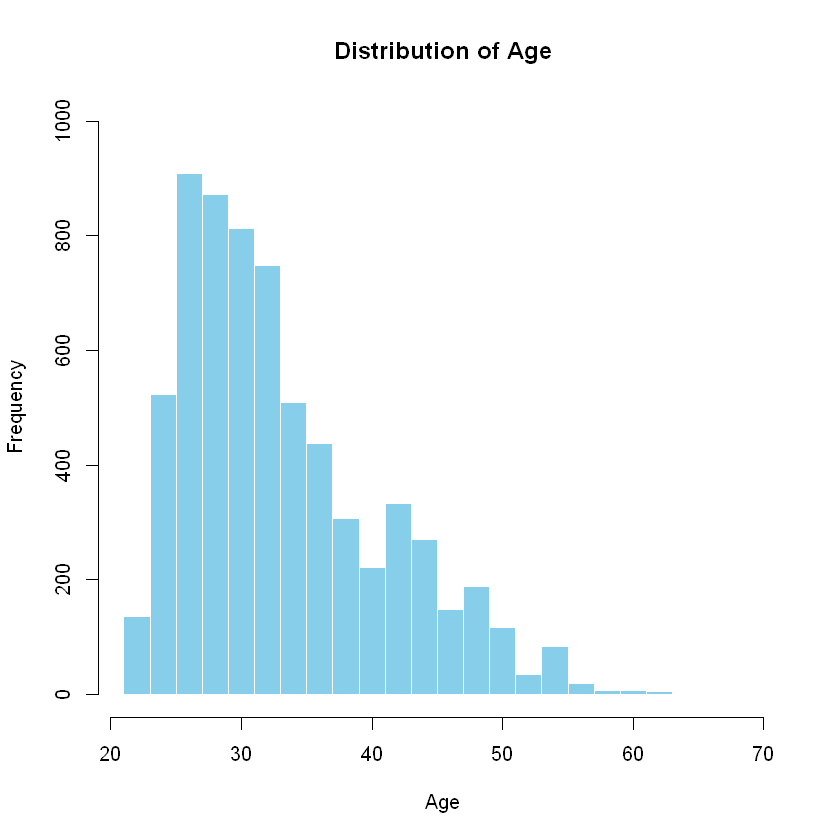

In [36]:
############################################################
# Histograms and QQPlots
############################################################
hist(dataset$Age, 
     breaks = seq(21, 70, by = 2), 
     xlim = c(21, 70),
     ylim = c(0, 1000),
     main = "Distribution of Age", 
     xlab = "Age", 
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

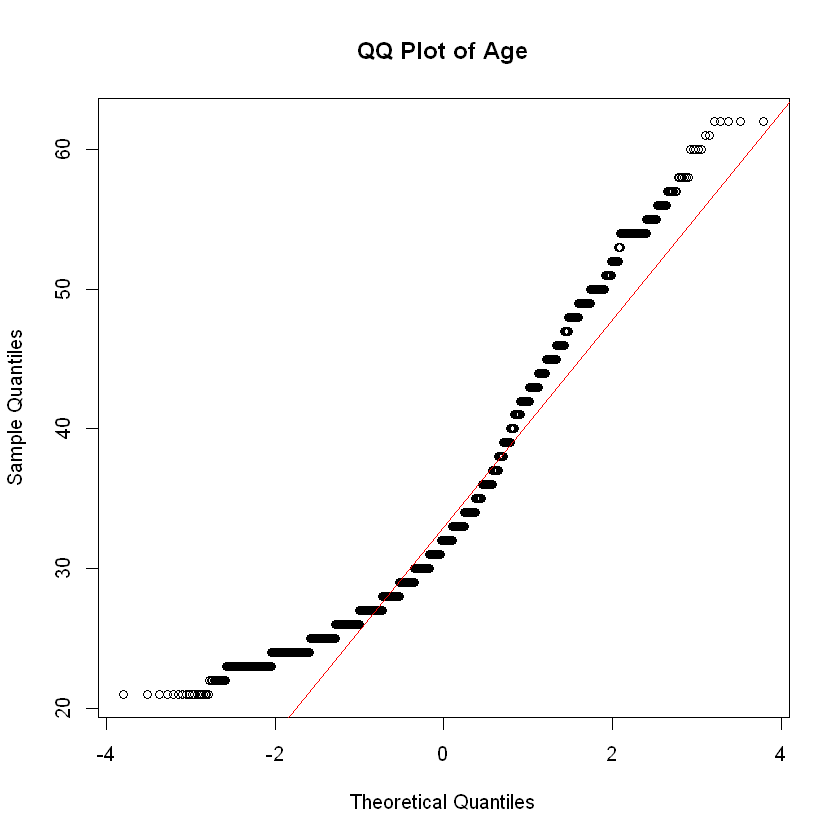

In [37]:
# Create QQ plot for the Age variable
qqnorm(dataset$Age, 
       main = "QQ Plot of Age", 
       xlab = "Theoretical Quantiles", 
       ylab = "Sample Quantiles")

# Add QQ line
qqline(dataset$Age, col = "red")

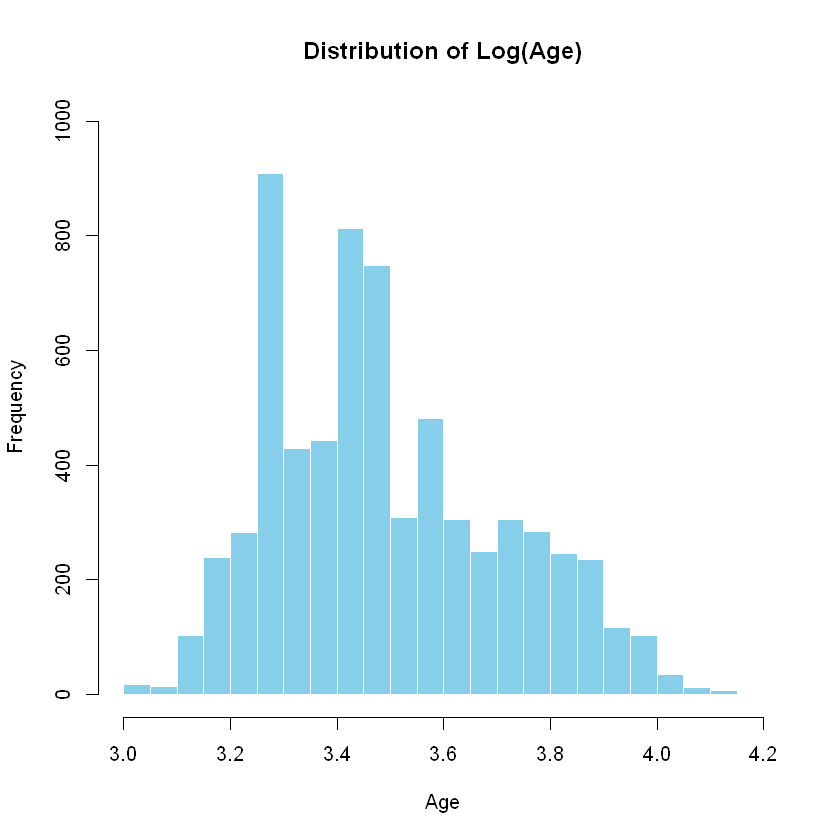

In [38]:
############################################################
# Histograms and QQPlots
############################################################
hist(log(dataset$Age), 
     breaks = seq(3, 4.2, by = 0.05), 
     xlim = c(3, 4.2),
     ylim = c(0, 1000),
     main = "Distribution of Log(Age)", 
     xlab = "Age", 
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

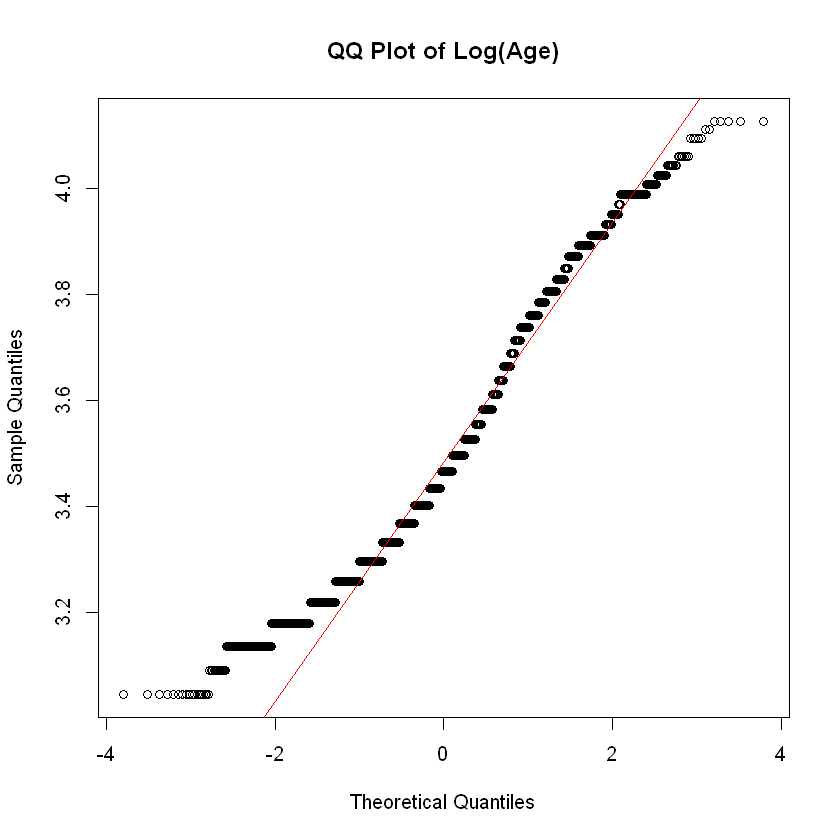

In [39]:
# Create QQ plot for the Age variable
qqnorm(log(dataset$Age), 
       main = "QQ Plot of Log(Age)", 
       xlab = "Theoretical Quantiles", 
       ylab = "Sample Quantiles")

# Add QQ line
qqline(log(dataset$Age), col = "red")

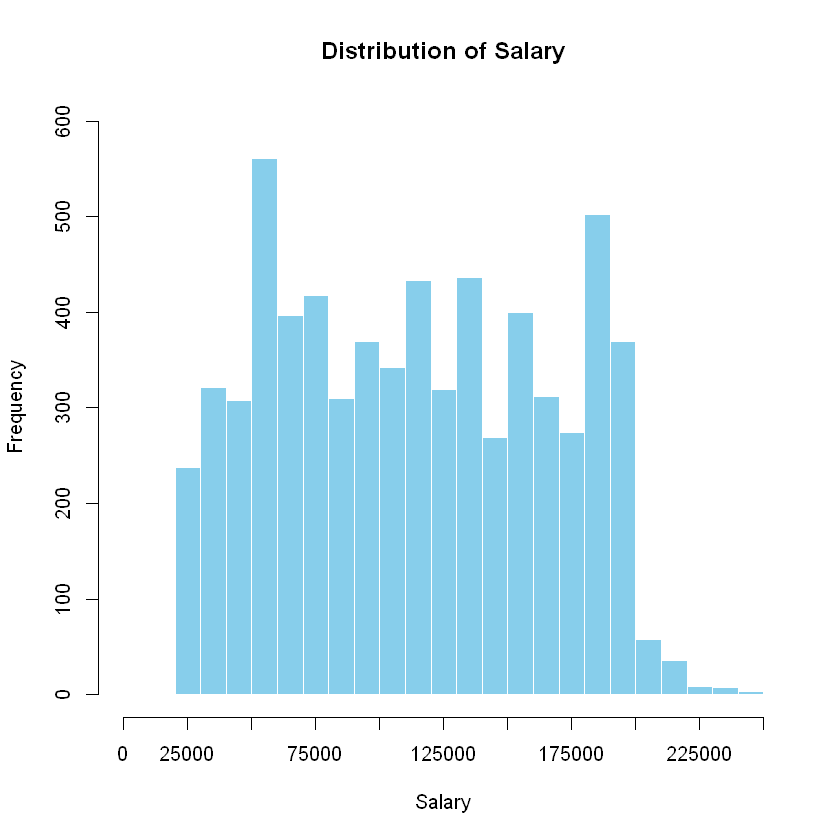

In [40]:
############################################################
# Histograms and QQPlots
############################################################
hist(dataset$Salary, 
     breaks = seq(0, 250000, by = 10000), 
     xlim = c(0, 250000),
     ylim = c(0, 600),
     xaxp = c(0, 250000, 10),
     main = "Distribution of Salary", 
     xlab = "Salary", 
     ylab = "Frequency",
     col = "skyblue",
     border = "white")


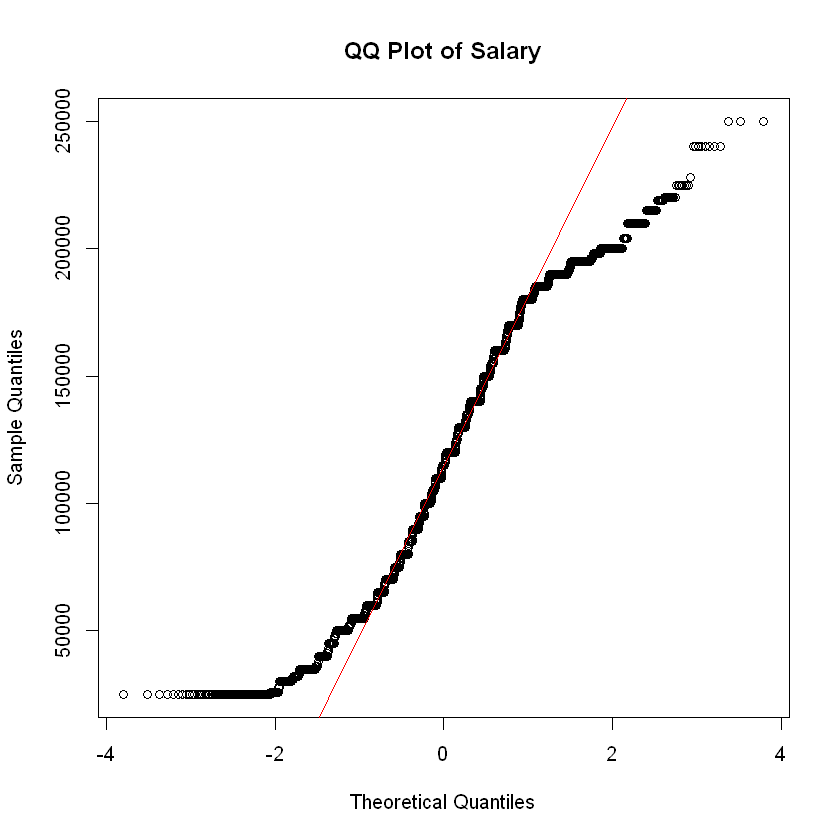

In [41]:
# Create QQ plot for the Age variable
qqnorm(dataset$Salary, 
       main = "QQ Plot of Salary", 
       xlab = "Theoretical Quantiles", 
       ylab = "Sample Quantiles")

# Add QQ line
qqline(dataset$Salary, col = "red")

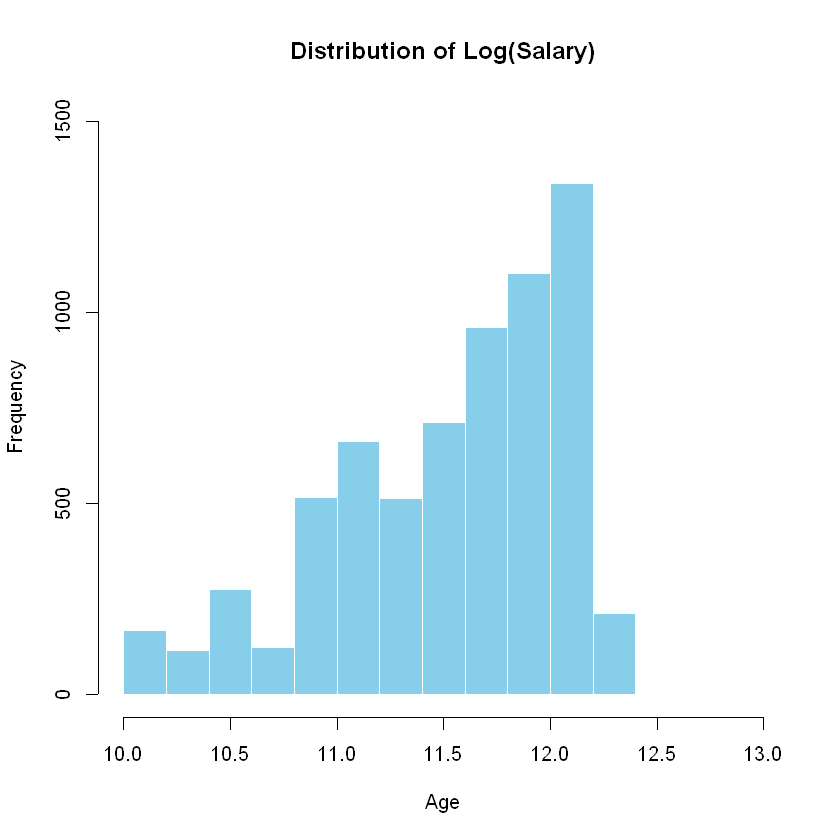

In [42]:
############################################################
# Histograms and QQPlots
############################################################
hist(log(dataset$Salary),
     breaks = seq(0, 13, by = 0.2), 
     xlim = c(10, 13),
     ylim = c(0, 1500),
     main = "Distribution of Log(Salary)", 
     xlab = "Age", 
     ylab = "Frequency",
     col = "skyblue",
     border = "white")

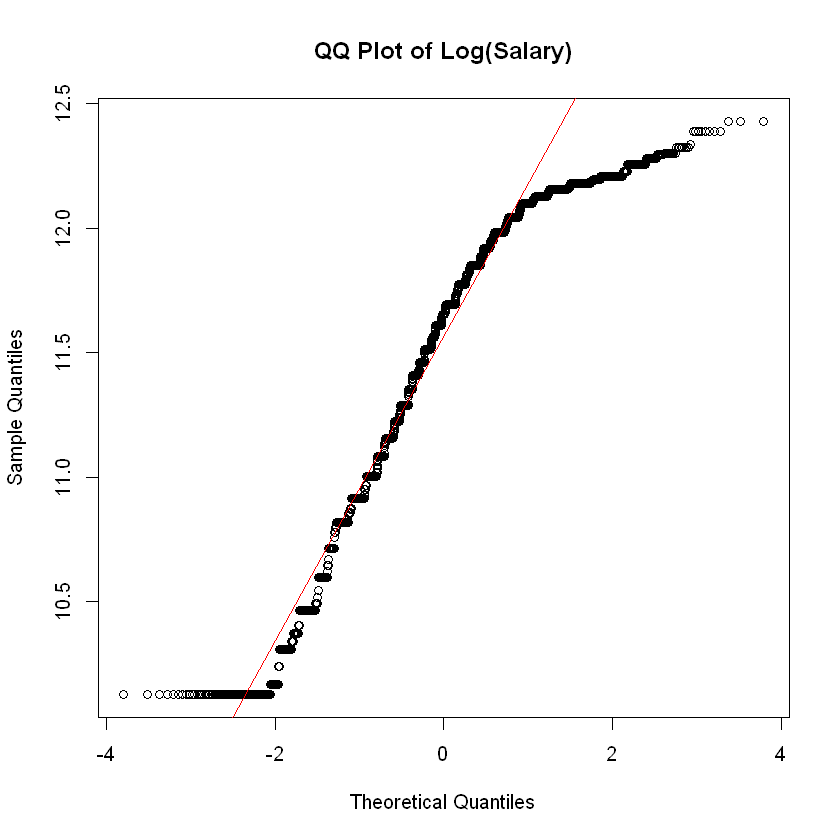

In [43]:
# Create QQ plot for the Age variable
qqnorm(log(dataset$Salary), 
       main = "QQ Plot of Log(Salary)", 
       xlab = "Theoretical Quantiles", 
       ylab = "Sample Quantiles")

# Add QQ line
qqline(log(dataset$Salary), col = "red")

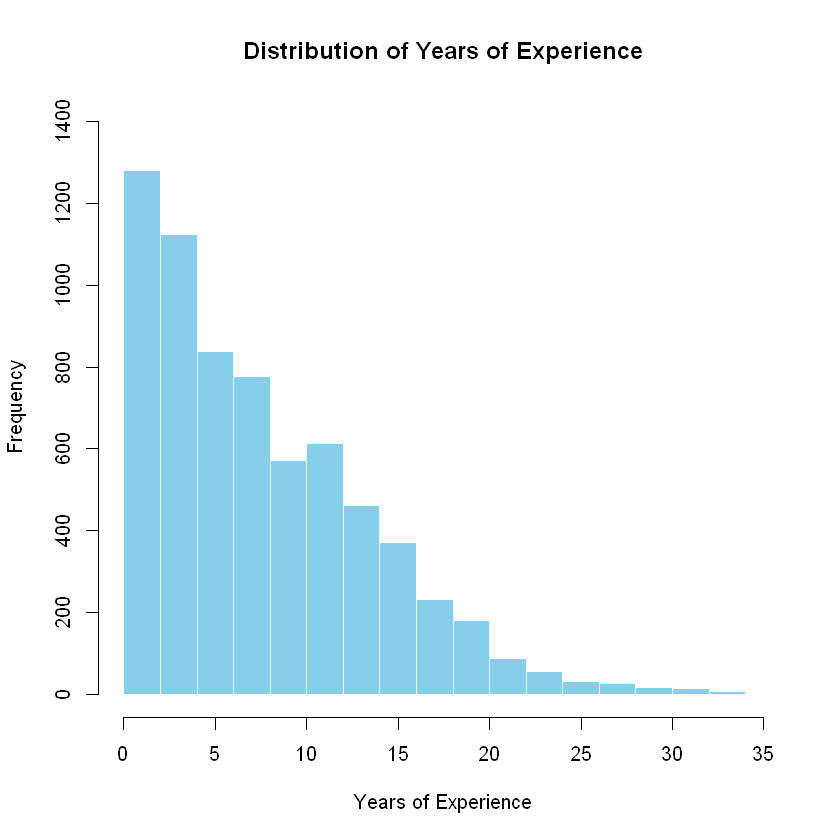

In [44]:
############################################################
# Histograms and QQPlots
############################################################
hist(dataset$Years.of.Experience,
     breaks = seq(0, 35, by = 2), 
     xlim = c(0, 35),
     ylim = c(0, 1400),
     main = "Distribution of Years of Experience", 
     xlab = "Years of Experience", 
     ylab = "Frequency",
     col = "skyblue",
     border = "white")


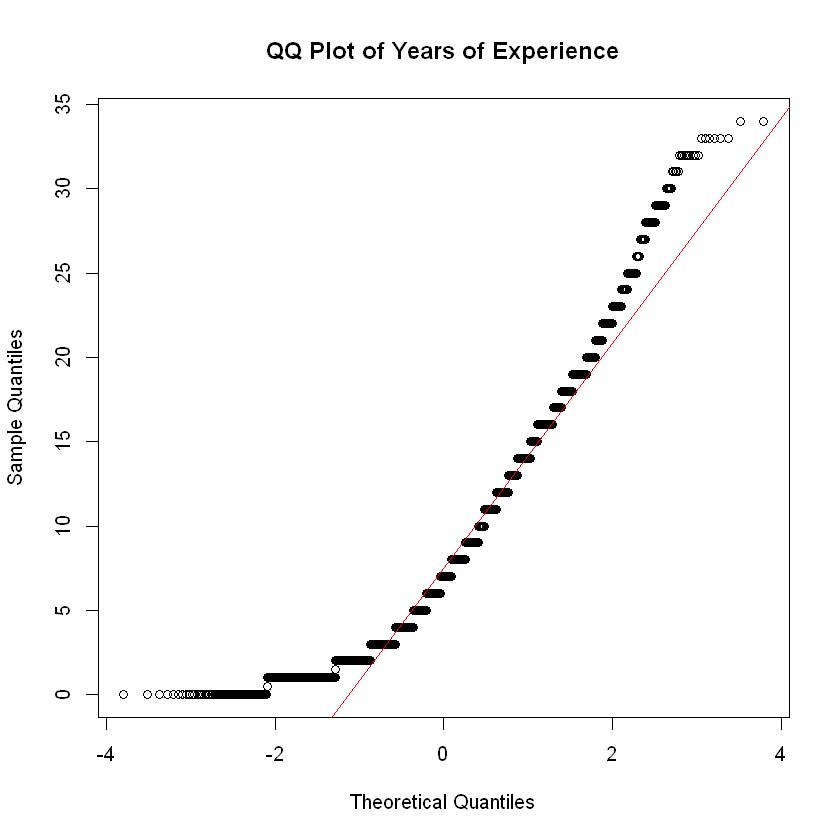

In [45]:
# Create QQ plot for the Age variable
qqnorm(dataset$Years.of.Experience, 
       main = "QQ Plot of Years of Experience", 
       xlab = "Theoretical Quantiles", 
       ylab = "Sample Quantiles")

# Add QQ line
qqline(dataset$Years.of.Experience, col = "red")

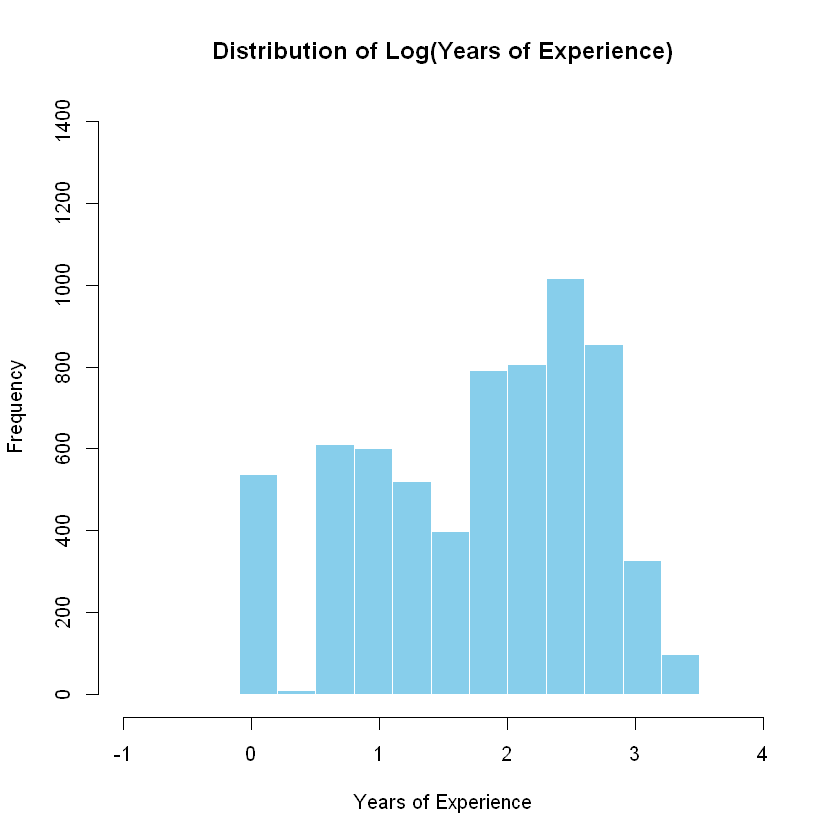

In [46]:
############################################################
# Histograms and QQPlots
############################################################
hist(log(dataset$Years.of.Experience),
     breaks = seq(-1, 4, by = 0.3), 
     xlim = c(-1, 4),
     ylim = c(0, 1400),
     main = "Distribution of Log(Years of Experience)", 
     xlab = "Years of Experience", 
     ylab = "Frequency",
     col = "skyblue",
     border = "white")


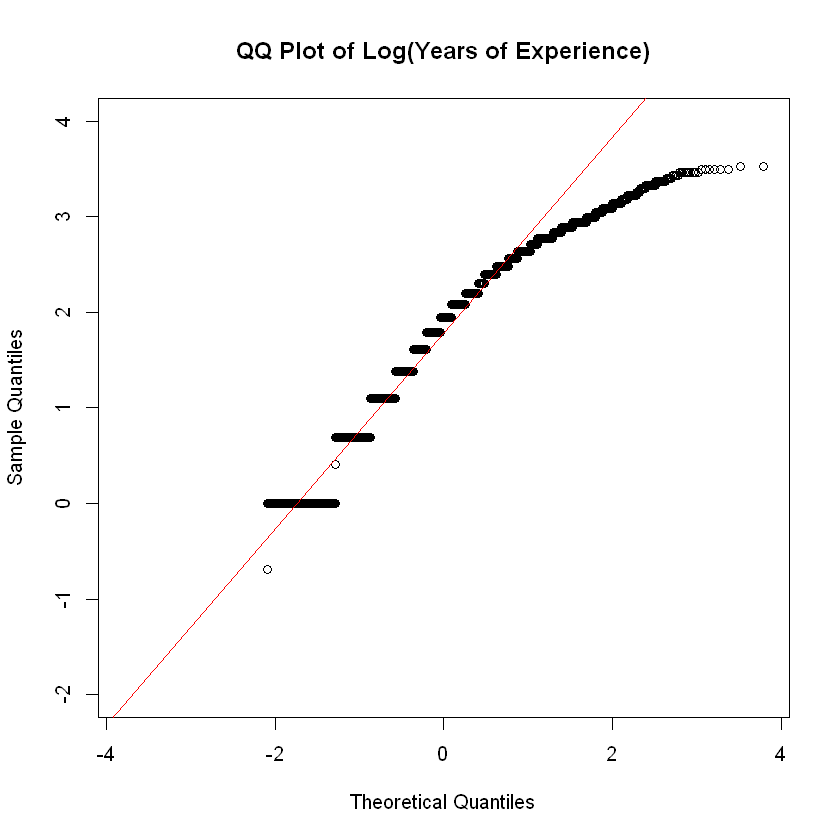

In [47]:
# Create QQ plot for the Age variable
qqnorm(log(dataset$Years.of.Experience), 
       main = "QQ Plot of Log(Years of Experience)", 
       xlab = "Theoretical Quantiles", 
       ylim = c(-2,4),
       ylab = "Sample Quantiles")

# Add QQ line
qqline(log(dataset$Years.of.Experience), col = "red")

Warning message:
"package 'wordcloud' is in use and will not be installed"
Warning message:
"packages 'tm', 'wordcloud' are in use and will not be installed"
Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"


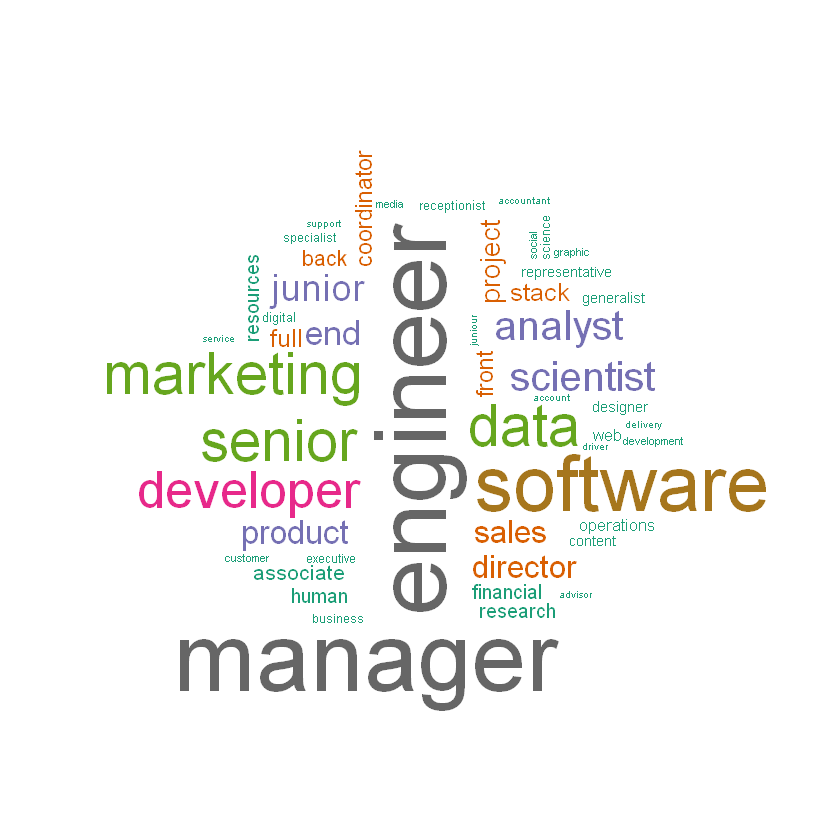

In [48]:
# Load the wordcloud package
install.packages("wordcloud")
install.packages(c("tm", "wordcloud"))
library(tm)
library(wordcloud)

# Generate word cloud for Job.Title
wordcloud(dataset$Job.Title, scale=c(5,0.5), min.freq = 5, random.order = FALSE, 
          colors=brewer.pal(8, "Dark2"))

In [49]:
subset_data_f <- subset(dataset, Gender_binary == 1)
subset_data_m <- subset(dataset, Gender_binary == 0)

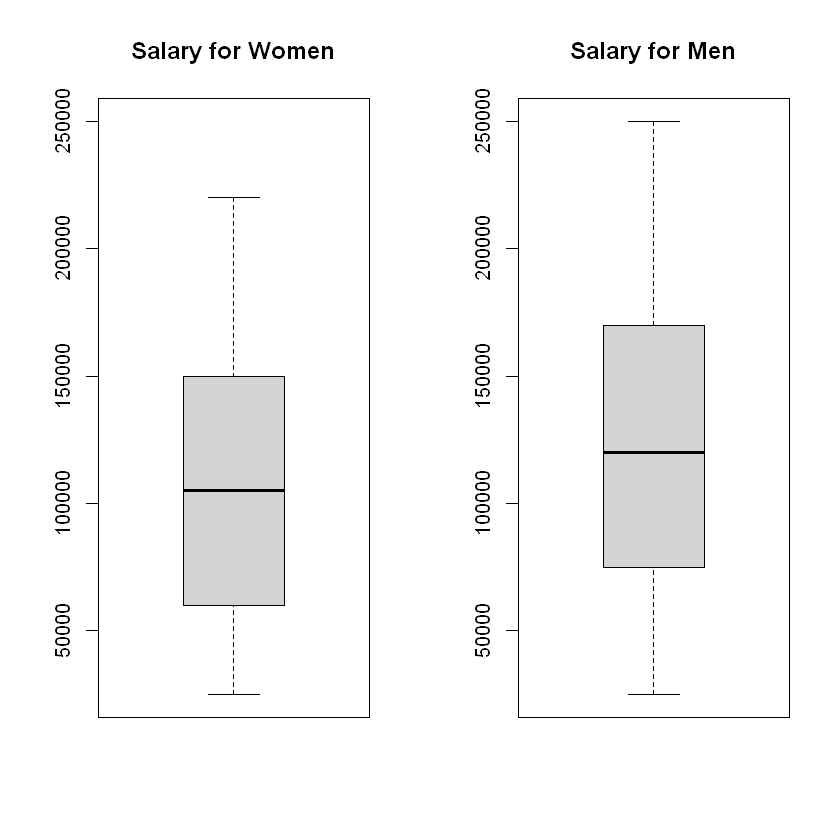

In [50]:
# Calculate the overall range of salary to set the same ylim for both plots
salary_range <- range(c(subset_data_f$Salary, subset_data_m$Salary))

# Set up the graphics device to display multiple plots side by side
par(mfrow = c(1, 2))

# Create side-by-side boxplots for salary by gender
boxplot(subset_data_f$Salary, main = "Salary for Women", ylim = salary_range)
boxplot(subset_data_m$Salary, main = "Salary for Men", ylim = salary_range)

In [64]:
median(subset_data_f$Salary)

[1] 105000

In [65]:
median(subset_data_m$Salary)

[1] 120000

In [68]:
subset_data_1 <- subset(dataset, Education.LevelHighSchool_combined == 1)
subset_data_2 <- subset(dataset, Education.LevelBachelors_combined == 1)
subset_data_3 <- subset(dataset, Education.LevelMasters_combined == 1)
subset_data_4 <- subset(dataset, Education.LevelPhD_combined == 1)

In [69]:
median(subset_data_1$Salary)

[1] 30000

In [70]:
median(subset_data_2$Salary)

[1] 80000

In [71]:
median(subset_data_3$Salary)

[1] 130000

In [72]:
median(subset_data_4$Salary)

[1] 170000

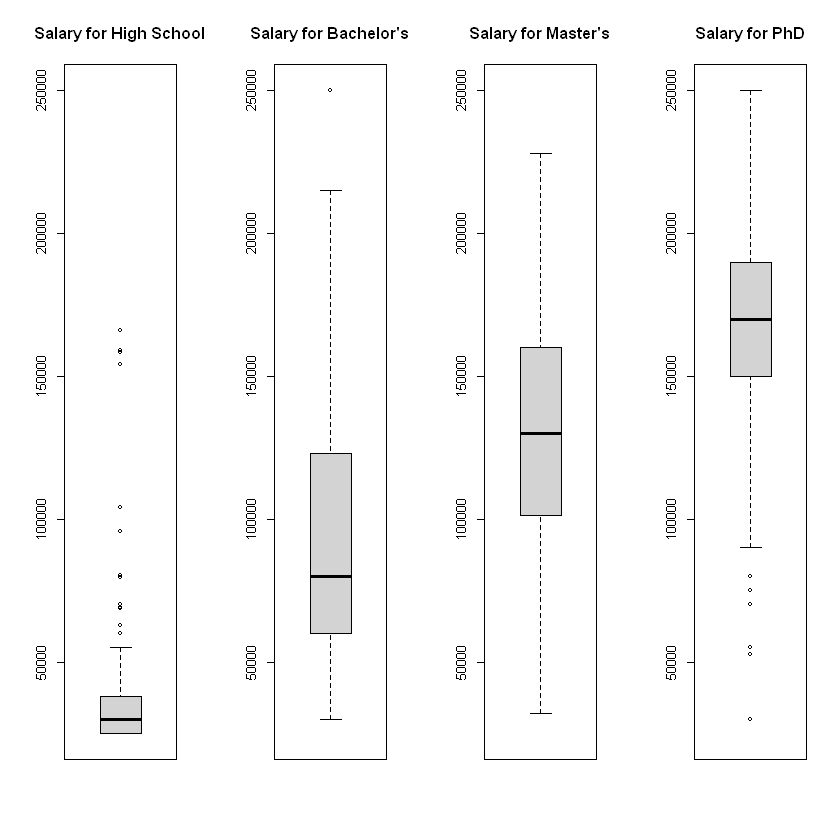

In [52]:
# Calculate the overall range of salary to set the same ylim for both plots
salary_range <- range(c(subset_data_1$Salary, subset_data_2$Salary, subset_data_3$Salary, subset_data_4$Salary))

# Set up the graphics device to display multiple plots side by side
par(mfrow = c(1, 4))

# Create side-by-side boxplots for salary by gender
boxplot(subset_data_1$Salary, main = "Salary for High School", ylim = salary_range)
boxplot(subset_data_2$Salary, main = "Salary for Bachelor's", ylim = salary_range)
boxplot(subset_data_3$Salary, main = "Salary for Master's", ylim = salary_range)
boxplot(subset_data_4$Salary, main = "Salary for PhD", ylim = salary_range)

In [53]:
dataset$Education <- ifelse(dataset$Education.LevelHighSchool_combined == 1, "HS",
                            ifelse(dataset$Education.LevelBachelors_combined == 1, "Bachelors",
                                   ifelse(dataset$Education.LevelMasters_combined == 1, "Masters",
                                          ifelse(dataset$Education.LevelPhD_combined == 1, "PhD", NA))))

dataset$Education <- factor(dataset$Education, levels = c("HS", "Bachelors", "Masters", "PhD"))

dataset$Gender <- ifelse(dataset$Gender_binary==1, "Female", "Male")

In [61]:
# install.packages("vcd")
library(vcd)
library(gmodels)


#' Load the source code for the *mosaic.plot()* function.
source("http://www-stat.wharton.upenn.edu/~buja/STAT-961/mosaic.R")

ERROR: Error in eval(ei, envir): cannot change value of locked binding for 'mosaic'


Call to mosaic.plot:
  dims entered = 1 2 
  actual dims  =   
----------------------------------------------------------------
           Female Male  Sum
                           
PhD           496  872 1368
Masters      1068  793 1861
Bachelors    1196 1823 3019
HS            251  197  448
Sum          3011 3685 6696
----------------------------------------------------------------
           Female  Male   Sum
                             
PhD         0.074 0.130 0.204
Masters     0.159 0.118 0.278
Bachelors   0.179 0.272 0.451
HS          0.037 0.029 0.067
Sum         0.450 0.550 1.000
----------------------------------------------------------------
           Female  Male
                       
PhD         0.165 0.237
Masters     0.355 0.215
Bachelors   0.397 0.495
HS          0.083 0.053
Sum         1.000 1.000
----------------------------------------------------------------


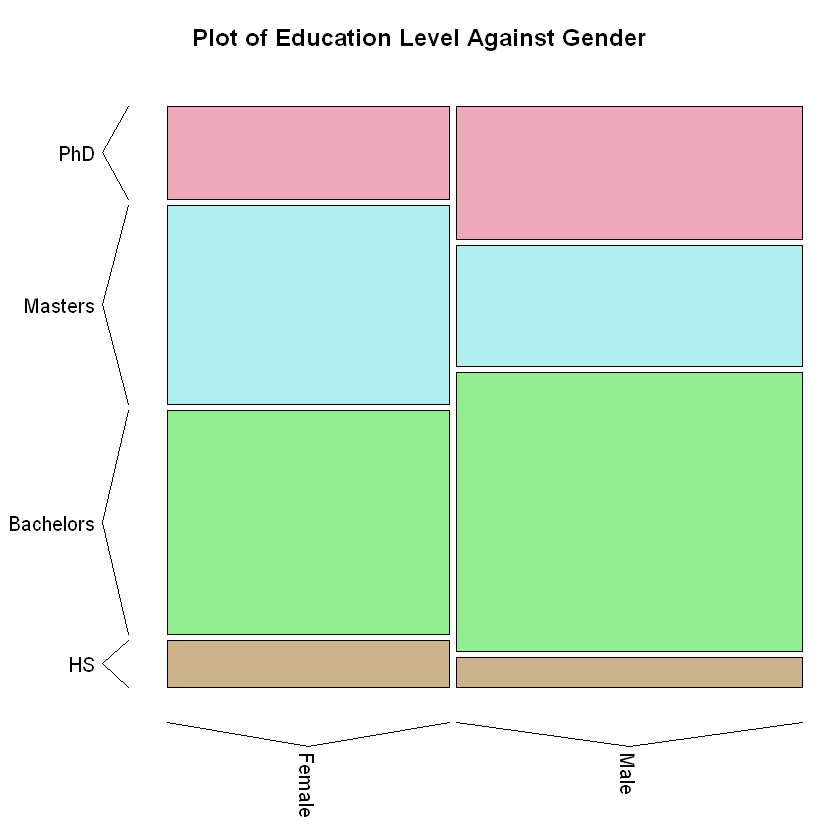

In [62]:
mosaic.plot(table(dataset$Gender, dataset$Education),
            main = "Plot of Education Level Against Gender")

In [ ]:
################################################################################
# Simple LR
################################################################################
linear_model <- lm(Salary ~ Gender_binary + Age + `Education.LevelHigh School` + `Education.LevelBachelors_combined` + `Education.LevelMasters_combined` + `Education.LevelPhD_combined`, data = dataset)
summary(linear_model)

# pretend we plotted the linearity, residuals, homoskedasticity, normality blah blah 
residuals <- resid(linear_model)
plot(dataset$Salary, residuals, 
     xlab = "Salary",
     ylab = "Residuals",
     main = "Residual Plot for linear_model")
abline(h = 0)

################################################################################
# Creating Confidence Intervals for Betas_gender for different Education Levels
################################################################################
linear_model_2 <- lm(Salary ~ Gender_binary + Age + `Education.LevelHigh School` + `Education.LevelBachelors_combined` + `Education.LevelMasters_combined` + `Education.LevelPhD_combined` + Gender_binary * `Education.LevelHigh School` + Gender_binary * `Education.LevelBachelors_combined` + Gender_binary * `Education.LevelMasters_combined` + Gender_binary * `Education.LevelPhD_combined`, data = dataset)

summary(linear_model_2)
conf_intervals <- confint(linear_model_2, "Gender_binary:`Education.LevelHigh School`")
print(conf_intervals)

conf_intervals <- confint(linear_model_2, "Gender_binary:Education.LevelBachelors_combined")
print(conf_intervals)

conf_intervals <- confint(linear_model_2, "Gender_binary:Education.LevelMasters_combined")
print(conf_intervals)

In [76]:
summary(lm(Salary ~ Gender_binary + Age , dataset))


Call:
lm(formula = Salary ~ Gender_binary + Age, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-108532  -24851   -4795   20687  100225 

Coefficients:
               Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   -50978.11    2094.60 -24.338 < 0.0000000000000002 ***
Gender_binary  -4434.24     892.61  -4.968          0.000000694 ***
Age             5006.92      58.32  85.859 < 0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36080 on 6693 degrees of freedom
Multiple R-squared:  0.5319,	Adjusted R-squared:  0.5317 
F-statistic:  3802 on 2 and 6693 DF,  p-value: < 0.00000000000000022
